In [38]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from scipy.optimize import curve_fit
from sympy import Matrix, print_latex, Transpose

# Elliott model

Elliott's Hamiltonian is given by

$$
H= \hbar\omega\hat{n} +\lambda\big(4\mathcal{C}^2(\lambda, \mu) -3\hat{L}^2\big) -H_{g.s.}
$$

where the coefficient $\lambda$ is to be fitted with experimental data.

In [39]:
# Oscillator frequency
def hbar_omega(A):                             
    return 45*A**(-1/3) - 25*A**(-2/3) 

# Operators of the Hamiltonian
def C2(l,m):
    return (l**2 + m**2 + l*m + 3.0*(l+m))

def C3(l,m):
    return (l-m)*(l + 2.0*m + 3.0)*(2.0*l + m + 3.0)

def L2(L):
    return L*(L+1.0)

In [40]:
Th224 = pd.read_csv("224Th.csv")

def Treatment(DATAFRAME, l0, m0, l1, m1):   # Receives a NNDC table dataframe, the h.w. irreps (l0, m0) and (l1,m1) of n = 0,1 respectively 
    
    DATAFRAME = DATAFRAME.drop(['T1/2'],axis=1)                         # Half life column deletion
    DATAFRAME.Jπ = DATAFRAME.Jπ.str.extract('(\d+)')                    # Angular momentum of level extracted
    DATAFRAME.Nucleus = DATAFRAME.Nucleus.str.extract('(\d+)')          # A value extracted
    DATAFRAME = DATAFRAME.dropna(axis=0)                                # NaA data deletion
    DATAFRAME["Energy"] = DATAFRAME["Energy"].str.split().str[0]        # Experimental error deletion

    DATAFRAME.columns = DATAFRAME.columns.str.replace('Nucleus', 'A')   # Columns renamed
    DATAFRAME.columns = DATAFRAME.columns.str.replace('Jπ', 'L') 
    
    DATAFRAME['L'] = DATAFRAME['L'].astype(int)                         # Type of entries changed to apropriate numerical values
    DATAFRAME['Energy'] = DATAFRAME['Energy'].astype(float)/1000
    DATAFRAME['A'] = DATAFRAME['A'].astype(int)
    
    DATAFRAME = DATAFRAME.sort_values('L', axis=0)                      # Columns sorted by angular momentum values
    DATAFRAME = DATAFRAME.reset_index()
    DATAFRAME = DATAFRAME.drop(['index'] ,axis=1)
        
    for i in range(0, len(np.array(DATAFRAME.index))):               # Insertion of parity, theoretical irreps and n to corresponding values of L
        
        if (int(DATAFRAME.at[i,'L'])%2==0):
            DATAFRAME.at[i,'n'] = 0
            DATAFRAME.at[i,'P'] = 1
            DATAFRAME.at[i,'lambda'] = l0
            DATAFRAME.at[i,'mu'] = m0
        else:
            DATAFRAME.at[i,'n'] = 1
            DATAFRAME.at[i,'P'] = -1
            DATAFRAME.at[i,'lambda'] = l1
            DATAFRAME.at[i,'mu'] = m1

        DATAFRAME.at[i,'hbaromega'] = hbar_omega(int(DATAFRAME.at[i,'A']))   # Single particle oscillation amplitude
        
    DATAFRAME['L2'] = DATAFRAME['L']*(DATAFRAME['L']+1)                      # Insertion of L² eigenvalues
    DATAFRAME['C2'] = C2(DATAFRAME['lambda'], DATAFRAME['mu'])               # Insertion of C²[SU(3)] eigenvalues
    DATAFRAME['C3'] = C3(DATAFRAME['lambda'], DATAFRAME['mu'])               # Insertion of C³[SU(3)] eigenvalues
    

    return DATAFRAME

# Depurated data
Th224 = Treatment(Th224,60,8,65,6)

In [41]:
Th224

,A,Energy,L,J,n,P,lambda,mu,hbaromega,L2,C2,C3
0,224,0.0000,0,0,0.0,1.0,60.0,8.0,6.73182,0,4348.0,538148.0
1,224,0.2510,1,1,1.0,-1.0,65.0,6.0,6.73182,2,4864.0,656080.0
2,224,0.0981,2,2,0.0,1.0,60.0,8.0,6.73182,6,4348.0,538148.0
3,224,0.3053,3,3,1.0,-1.0,65.0,6.0,6.73182,12,4864.0,656080.0
4,224,0.2841,4,4,0.0,1.0,60.0,8.0,6.73182,20,4348.0,538148.0
5,224,0.4645,5,5,1.0,-1.0,65.0,6.0,6.73182,30,4864.0,656080.0
6,224,0.5347,6,6,0.0,1.0,60.0,8.0,6.73182,42,4348.0,538148.0
7,224,0.6995,7,7,1.0,-1.0,65.0,6.0,6.73182,56,4864.0,656080.0
8,224,0.8339,8,8,0.0,1.0,60.0,8.0,6.73182,72,4348.0,538148.0
9,224,0.9977,9,9,1.0,-1.0,65.0,6.0,6.73182,90,4864.0,656080.0


In [42]:
# Extracting data into arrays
Th224data = Th224[['hbaromega', 'n', 'C2', 'C3', 'L2']].to_numpy()
ETh = Th224['Energy'].to_numpy()
LTh = Th224['L'].to_numpy()

# Hamiltonian for Thorium 224

def Th_H(THDATA, lam):
    
    hbaromega = THDATA[0]
    n = THDATA[1]
    Cas2 = THDATA[2]
    Lsq = THDATA[4]
    
    return hbaromega*n + lam*(4*Cas2 - 3*Lsq) - lam*(4*C2(60,8))

In [43]:
# Parameters
poptTh, pcovTh = curve_fit(Th_H, Th224data.transpose(), ETh)
print("Parameters: \n", poptTh)
print("\nCovariance: \n", pcovTh)

Parameters: 
 [-0.00320365]

Covariance: 
 [[1.11225633e-09]]


L    Eth        Eexp
0    0.0    0.0
1    0.1387    0.251
2    0.05767    0.0981
3    0.23481    0.3053
4    0.19222    0.2841
5    0.40781    0.4645
6    0.40366    0.5347
7    0.65769    0.6995
8    0.69199    0.8339
9    0.98447    0.9977
10    1.05721    1.1738
11    1.38813    1.3473
12    1.49931    1.5498
13    1.86867    1.7387
14    2.0183    1.9589
15    2.42611    2.1647
16    2.61418    2.398
17    3.06043    2.6202
18    3.28695    2.864


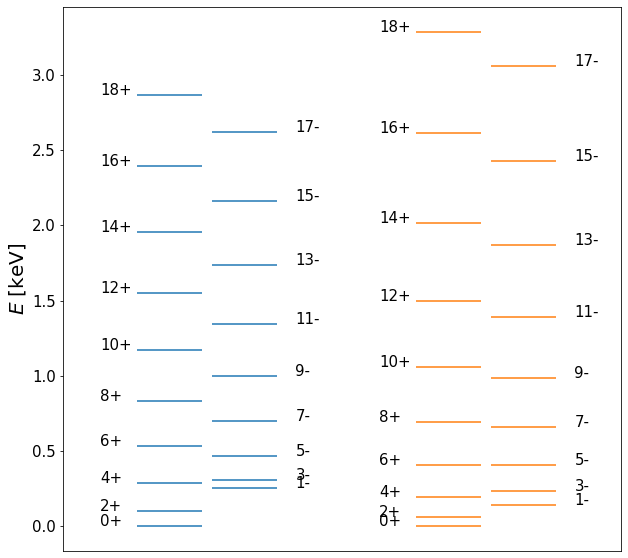

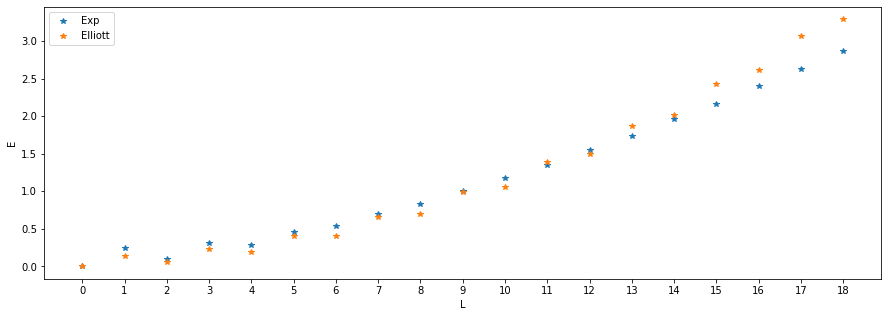

MSE:  0.17712551679503177
R²:  0.9595915842562901


In [44]:
# Predictions of the model
FITTh = []

print("L    Eth        Eexp")

for i, j, k in zip(Th224data, LTh, ETh):
    Epred = Th_H(i, poptTh[0])
    FITTh.append(Epred)
    print(j, "  ", round(Epred, 5), "  ", round(k, 5))

# Plot ===================================================================
fig = plt.figure(figsize=(10,10))
p = 0

for i in range(len(FITTh)): 
    
    p1 = 0.8

    if i%2==0:
        
        plt.hlines(Th224["Energy"][i], p, p+0.7, colors = "C0")
        plt.text(p-0.4, Th224["Energy"][i], str(i)+"+", fontsize = 15)

        plt.hlines(FITTh[i], p+3, p+3+0.7, colors = "C1")
        plt.text(p-0.2+2.8, FITTh[i], str(i)+"+", fontsize = 15)

    else:
        plt.hlines(Th224["Energy"][i], p1, p1+0.7, colors = "C0")
        plt.text(p1+0.7+0.2, Th224["Energy"][i], str(i)+"-", fontsize = 15)
        
        plt.hlines(FITTh[i], p1+3, p1+3+0.7, colors = "C1")
        plt.text(p1+0.7+0.2+3, FITTh[i], str(i)+"-", fontsize = 15)

    xs = [[p+0.7, p1],[p+0.7, p1],[p+0.7, p1], [p+0.7, p1], [p1, p+0.7], [p+0.7, p1], [p1, p+0.7], [p+0.7, p1],
      [p1, p+0.7], [p+0.7, p1], [p1, p+0.7], [p+0.7, p1], [p1, p+0.7], [p+0.7, p1], [p1, p+0.7], [p+0.7, p1],
     [p1, p+0.7]]

plt.yticks(fontsize=15)
plt.xlim(left=-0.8, right=5.2)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('$E$ [keV]', size=20)


# Plot of energy levels
fig = plt.figure(figsize=(15,5))
plt.plot(LTh, ETh, '*', label='Exp')
plt.plot(LTh, FITTh,'*', label='Elliott')
plt.xticks(np.arange(0,19,1))
plt.xlabel('L')
plt.ylabel('E')
plt.legend()
plt.show()


# RMS
EE = Th224["Energy"].to_numpy()
ET = np.array(FITTh)
mse = mean_squared_error(EE, ET, squared=False)
r2 = r2_score(EE, ET)

print("MSE: ", mse)
print("R²: ", r2)

# J. Cseh model

The Hamiltonian that considers a quadrupole two and three body interaction is given by 

$$H = \hbar\omega\hat{n} + a\big(\hat{C}^2_{SU(3)}(\lambda, \mu) -0.004 \hat{C}^3_{SU(3)}(\lambda, \mu)\big) + c\hat{L}^2 -H_{g.s.}$$

where the coefficients $a,b$ and $c$ are to be fitted with experimental data.


In [45]:
# Extracting data into arrays
Th224data = Th224[['hbaromega', 'n', 'C2', 'C3', 'L2']].to_numpy()
ETh = Th224['Energy'].to_numpy()
LTh = Th224['L'].to_numpy()

# Hamiltonian for Thorium 224

def Th_H_Cseh(THDATA, a,  c):
    
    hbaromega = THDATA[0]
    n = THDATA[1]
    Cas2 = THDATA[2]
    Cas3 = THDATA[3]
    Lsq = THDATA[4]
    
    return hbaromega*n + a*(Cas2 -0.004*Cas3) + c*Lsq - a*(C2(60,8) - 0.004*C3(60,8))

In [46]:
# Parameters
poptThCseh, pcovThCseh = curve_fit(Th_H_Cseh, Th224data.transpose(), ETh)
print("Parameters: \n", poptThCseh)
print("\nCovariance: \n", pcovThCseh)

Parameters: 
 [-0.1484587   0.00871961]

Covariance: 
 [[ 1.17446312e-06 -1.10755962e-07]
 [-1.10755962e-07  4.20290551e-08]]


L    Eth        Eexp
0    0.0    0.0
1    0.1767    0.251
2    0.05232    0.0981
3    0.26389    0.3053
4    0.17439    0.2841
5    0.42084    0.4645
6    0.36622    0.5347
7    0.64755    0.6995
8    0.62781    0.8339
9    0.94402    0.9977
10    0.95916    1.1738
11    1.31025    1.3473
12    1.36026    1.5498
13    1.74623    1.7387
14    1.83112    1.9589
15    2.25196    2.1647
16    2.37173    2.398
17    2.82746    2.6202
18    2.98211    2.864


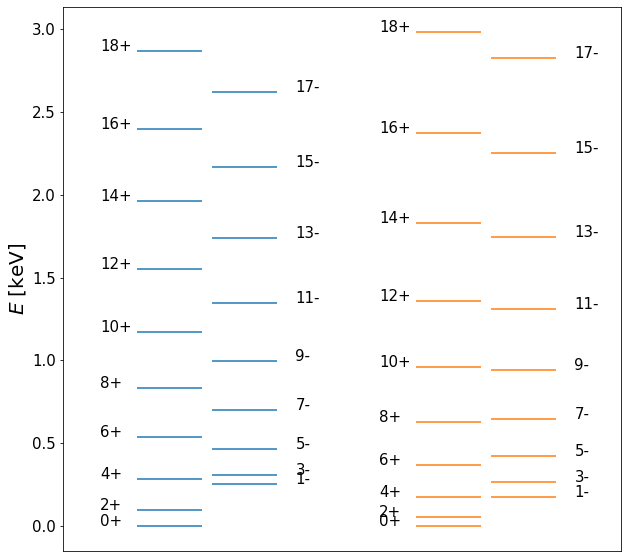

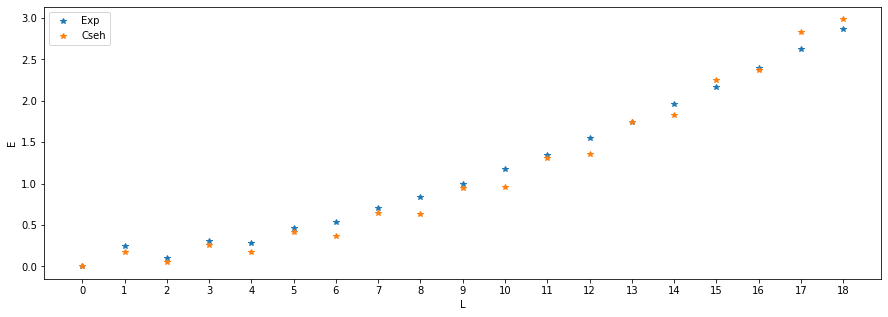

MSE:  0.11802638196209422
R²:  0.9820581281037594


In [47]:
# Predictions of the model
FITThCseh = []

print("L    Eth        Eexp")
for i, j, k in zip(Th224data, LTh, ETh):
    Epred = Th_H_Cseh(i, poptThCseh[0], poptThCseh[1])
    FITThCseh.append(Epred)
    print(j, "  ", round(Epred, 5), "  ", round(k, 5))

# Plot
fig = plt.figure(figsize=(10,10))

p = 0

for i in range(len(FITThCseh)): 
    
    p1 = 0.8

    if i%2==0:
        
        plt.hlines(Th224["Energy"][i], p, p+0.7, colors = "C0")
        plt.text(p-0.4, Th224["Energy"][i], str(i)+"+", fontsize = 15)

        plt.hlines(FITThCseh[i], p+3, p+3+0.7, colors = "C1")
        plt.text(p-0.2+2.8, FITThCseh[i], str(i)+"+", fontsize = 15)

    else:
        plt.hlines(Th224["Energy"][i], p1, p1+0.7, colors = "C0")
        plt.text(p1+0.7+0.2, Th224["Energy"][i], str(i)+"-", fontsize = 15)
        
        plt.hlines(FITThCseh[i], p1+3, p1+3+0.7, colors = "C1")
        plt.text(p1+0.7+0.2+3, FITThCseh[i], str(i)+"-", fontsize = 15)

    xs = [[p+0.7, p1],[p+0.7, p1],[p+0.7, p1], [p+0.7, p1], [p1, p+0.7], [p+0.7, p1], [p1, p+0.7], [p+0.7, p1],
      [p1, p+0.7], [p+0.7, p1], [p1, p+0.7], [p+0.7, p1], [p1, p+0.7], [p+0.7, p1], [p1, p+0.7], [p+0.7, p1],
     [p1, p+0.7]]

plt.yticks(fontsize=15)
plt.xlim(left=-0.8, right=5.2)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('$E$ [keV]', size=20)


# Plot of energy levels
fig = plt.figure(figsize=(15,5))
plt.plot(LTh, ETh, '*', label='Exp')
plt.plot(LTh, FITThCseh,'*', label='Cseh')
plt.xticks(np.arange(0,19,1))
plt.xlabel('L')
plt.ylabel('E')
plt.legend()
plt.show()


# RMS
EECseh = Th224["Energy"].to_numpy()
ETCseh = np.array(FITThCseh)
mse = mean_squared_error(EECseh, ETCseh, squared=False)
r2 = r2_score(EECseh, ETCseh)

print("MSE: ", mse)
print("R²: ", r2)

# Elliott model plus octupole-octupole

Elliott's Hamiltonian is given by

$$
H = \hbar\omega\hat{n}+\chi \mathcal{Q}^2\cdot \mathcal{Q}^2 +\tau \mathcal{O}^3\cdot \mathcal{O}^3 -H_{g.s}
$$

where the coefficients $\lambda$ and $\tau$ are to be fitted with experimental data. This Hamiltonian has non-diagonal matrix elements so that a diagonalization procedure must be done as well.

In [86]:
# States in order g.s, ex. b
statesJ = [0,2,4,6,8,10,12,14,16,18, 1,3,5,7,9,11,13,15,17, 1,3,5,7,9,11,13,15,17]

# Functions to 
def hwMatrix(J):
    if J%2 == 0:
        return 0
    else:
        return hbar_omega(224)
         
def QQMatrix(J):
    if J%2 == 0:
        return 4*C2(60,8)-3*L2(J)
    else:
        return 4*C2(65,6)-3*L2(J)
    
def gsMatrix(J):
    return 4*C2(60,8)

In [95]:
# 2D Arrays to store the matrix elements as matrices
m_h_w = np.zeros((len(statesJ), len(statesJ)))
m_Q_Q = np.zeros((len(statesJ), len(statesJ)))
m_g_s = np.zeros((len(statesJ), len(statesJ)))
m_O_O = np.zeros((len(statesJ), len(statesJ)))

# Matrix elements of O.O
Egs = [4.594636832158156,
       25.897404390428918,
       36.64373965329687,
       32.02807172615931,
       30.43605063680653, 
       29.478032666197976, 
       28.809564685423616, 
       28.386468852633715, 
       28.249112819334112, 
       28.469265255959932]

Eexpi = [0.05827510520886164,
         0.8027153972596531,
         0.7431622423566357,
         1.0361949960445656,
         1.4556022761715535,
         1.9908342402682555,
         2.643896303363192,
         3.420273364925814,
         4.327215153647977]

Eexnu = [12.792934574833067,
         50.66205957815311,
         32.93119278267128,
         29.997444920714177,
         28.228602287410055,
         26.737817986795083,
         25.36755058570206,
         24.119175164769597,
         23.046987186973166]

Endiag = [0.8056997994585147,
          5.865266667267474,
          3.9895444714984682,
          4.177603301814239 ,
          4.651988557486208,
          5.28461444373919,
          6.039956564565625,
          6.905734645335472,
          7.881763256425683]

for i in range(len(Egs)):
    m_O_O[i,i] = Egs[i]

for i in range(len(Eexpi)):
    m_O_O[len(Egs)+i,len(Egs)+i] = Eexpi[i]

for i in range(len(Eexnu)):
    m_O_O[len(Egs)+len(Eexpi)+i,len(Egs)+len(Eexpi)+i] = Eexnu[i]
    
for i in range(len(Endiag)):
    m_O_O[len(Egs)+i,len(Egs)+len(Eexpi)+i] = Endiag[i]
    m_O_O[len(Egs)+len(Eexpi)+i,len(Egs)+i] = Endiag[i]

In [96]:
# Calculation of matrix elements 
for i in range(len(m_h_w[0])):
    m_h_w[i][i] = hwMatrix(statesJ[i])
    m_Q_Q[i][i] = QQMatrix(statesJ[i])
    m_g_s[i][i] = gsMatrix(statesJ[i])

In [97]:
# To print matrices in latex format
Sympy_h_w = Matrix(m_h_w)
Sympy_Q_Q = Matrix(m_Q_Q)
Sympy_O_O = Matrix(m_O_O)
Sympy_g_s = Matrix(m_g_s)

In [98]:
# Experimental energy values of K = 0+, L = 0,2,4,6,8,10,12,14,16,18 and K = 0-, L = 1,3,5,7,9,11,13,15,17
EE_O_O = np.concatenate((Th224[Th224["L"]%2==0]["Energy"].to_numpy(), 
                         Th224[Th224["L"]%2!=0]["Energy"].to_numpy(),
                         Th224[Th224["L"]%2!=0]["Energy"].to_numpy()))

In [99]:
# Dummy input
x = 0

# Function to perform the fit of parameters of non-diagonal Hamiltonian
def Hamiltonian_O_O(x, a, b):       
    
    # Parameter dependent Hamiltonian matrix
    SympyH = Sympy_h_w + a*Sympy_Q_Q + b*Sympy_O_O - a*Sympy_g_s
    H = np.array(SympyH).astype(np.float64)

    # Diagonal Hamiltonian and conversion to numpy array
    P, SympyHDiag = Matrix(H).diagonalize()
    HDiag = np.array(SympyHDiag).astype(np.float64)
    
    # Conversion to numpy array
    Pinv = np.array(P).astype(np.float64)    # P is actually P**-1
        
    # Expected energy values <ψ|H|ψ'>
    EE = []
    
    for i in range(len(H[0])):
        suma = 0
        for j in range(len(H[0])):
            suma += Pinv[i][j]**2*HDiag[j][j]
            
        EE.append(suma)
    
    return EE 

In [100]:
# Estimation of parameters
poptTh_O_O, pcovTh_O_O = curve_fit(Hamiltonian_O_O, x, EE_O_O)

print("Parameters:")
print("χ =",poptTh_O_O[0], "\nτ =",poptTh_O_O[1])
print("\nCovariance: \n", pcovTh_O_O)

Parameters:
χ = -0.0032065558987161248 
τ = -0.0010141509343325166

Covariance: 
 [[ 6.91942465e-10 -1.55124248e-08]
 [-1.55124248e-08  2.44704891e-06]]


In [101]:
# Predictions of the model
Epred_O_O = Hamiltonian_O_O(0, poptTh_O_O[0], poptTh_O_O[1])

print("L    Eth        Eexp")

for i in range(len(EE_O_O)):
    print(statesJ[i], "  ", round(Epred_O_O[i], 5), "  ", round(EE_O_O[i], 5))

    
    
    


mse = mean_squared_error(EE_O_O, Epred_O_O, squared=False)
r2 = r2_score(EE_O_O, Epred_O_O)

print("\nMSE: ", mse)
print("R²: ", r2)

L    Eth        Eexp
0    -0.00466    0.0
2    0.03145    0.0981
4    0.15523    0.2841
6    0.37154    0.5347
8    0.66175    0.8339
10    1.02827    1.1738
12    1.47145    1.5498
14    1.99134    1.9589
16    2.5879    2.398
18    3.26105    2.864
1    0.13267    0.251
3    0.22811    0.3053
5    0.40132    0.4645
7    0.65114    0.6995
9    0.97778    0.9977
11    1.38127    1.3473
13    1.86159    1.7387
15    2.41874    2.1647
17    3.05272    2.6202
1    0.11975    0.251
3    0.17755    0.3053
5    0.36868    0.4645
7    0.62177    0.6995
9    0.95063    0.9977
11    1.35617    1.3473
13    1.83854    1.7387
15    2.39775    2.1647
17    3.03373    2.6202

MSE:  0.17731282810681928
R²:  0.9571411623065762
